# Рынок заведений общественного питания Москвы

### План проекта
 
1.[Загрузить данные и подготовить их к анализу](#cell1)

2.[Анализ данных](#cell2)

3.[Презентация](#cell3)


### Загрузить данные и подготовить их к анализу
<a id='cell1'></a>

4.1 Импортировал необходимые библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import statistics
import requests
import re
import warnings 
warnings.filterwarnings('ignore')

4.2 Сохранил данные в переменной rest_df.

In [2]:
rest_df = pd.read_csv('/datasets/rest_data.csv')
display(rest_df.head())

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


4.3 Преобразовал значения столбца object_name в нижний регистр.

In [3]:
rest_df['object_name'] = rest_df['object_name'].str.lower()
rest_df.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


4.4 Произвел проверку пустых значений.

In [4]:
rest_df.isnull().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

Пустые значения отсутствуют.

4.5 Произвел проверку дубликатов.

In [5]:
rest_df[rest_df[['object_name', 'address']].duplicated()]

,id,object_name,chain,object_type,address,number
114,28613,комбинат питания мгту им.н.э.баумана,нет,закусочная,"город Москва, Бригадирский переулок, дом 3-5",216
115,28614,комбинат питания мгту им.н.э.баумана,нет,буфет,"город Москва, Бригадирский переулок, дом 3-5",12
579,149227,общественное питание,нет,столовая,"город Москва, Павелецкая площадь, дом 1",70
580,149205,общественное питание,нет,кафе,"город Москва, Павелецкая площадь, дом 1",35
581,149131,общественное питание,нет,кафе,"город Москва, Павелецкая площадь, дом 1",39
...,...,...,...,...,...,...
15217,214146,макдоналдс,да,предприятие быстрого обслуживания,"город Москва, Кировоградская улица, дом 13А",0
15241,210885,kfc,да,предприятие быстрого обслуживания,"город Москва, Манежная площадь, дом 1, строение 2",41
15253,214872,чайхона №1,да,кафе,"город Москва, Кутузовский проспект, дом 57",0
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20


In [6]:
rest_df.drop_duplicates(subset=['object_name', 'address'], keep='last')

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15360,219759,шоколадница,да,кафе,"город Москва, улица Вавилова, дом 3",36
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


4.6 Проверил тип данных.

In [7]:
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


С типом данных все впорядке.

In [8]:
rest_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,15366,NaN,NaN,NaN,119720,73036.1,838,28524,144974,184262,223439
object_name,15366,9924,столовая,321,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chain,15366,2,нет,12398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
object_type,15366,9,кафе,6099,NaN,NaN,NaN,NaN,NaN,NaN,NaN
address,15366,9108,"город Москва, Ходынский бульвар, дом 4",95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number,15366,NaN,NaN,NaN,59.5472,74.7368,0,12,40,80,1700


Вывод: Пустые значения в датафрейме rest_df отсутсвуют, тип данных не требует изменений, дубликаты в количестве 225 были удалены из условия одинаковых значений данных по столбцам 'object_name' и 'address'.

### Анализ данных 
<a id='cell2'></a>

1. Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.
2. Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.
3. Для какого вида объекта общественного питания характерно сетевое распространение?
4. Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
5. Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.
6. Выделите в отдельный столбец информацию об улице из столбца address .
7. Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
8. Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
9. Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?
10. Сделайте общий вывод и дайте рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируйте возможность развития сети.

5.1 Исследовал соотношение видов объектов общественного питания по количеству. Построил график.

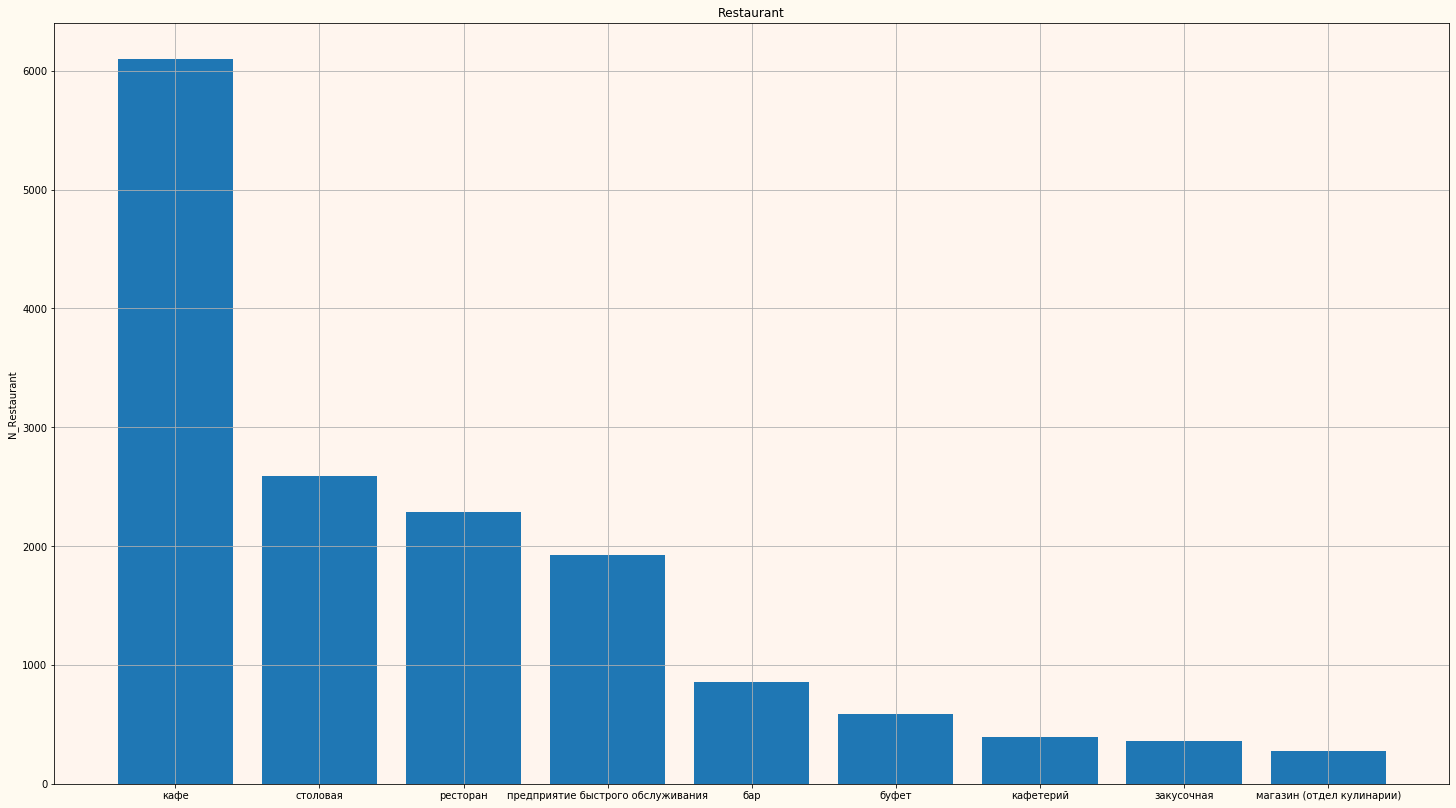

In [9]:
n_restaurant = rest_df.groupby('object_type').agg({'id': 'count'}).reset_index()
n_restaurant.columns = ['object_type','n_restaurant']

n_restaurant = n_restaurant.sort_values(by='n_restaurant', ascending=False)

# построил график 
x = n_restaurant['object_type']
y = n_restaurant['n_restaurant']

fig, ax = plt.subplots()

ax.bar(x, y)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(25)    #  ширина Figure
fig.set_figheight(14)    #  высота Figure

ax.set_ylabel('N_Restaurant')
ax.set_title('Restaurant')

ax.grid()

plt.show()

5.2 Исследовал соотношение сетевых и несетевых заведений по количеству. Построил график.

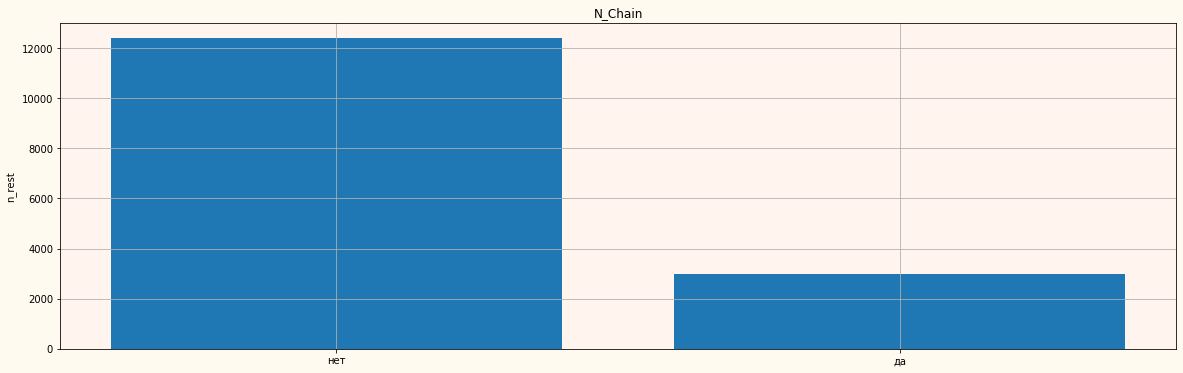

In [10]:
chain_restaurant = rest_df.groupby('chain').agg({'id': 'count'}).reset_index()
chain_restaurant.columns = ['chain','n_chain']

chain_restaurant = chain_restaurant.sort_values(by='n_chain', ascending=False)

# построил график 
x = chain_restaurant['chain']
y = chain_restaurant['n_chain']

fig, ax_1 = plt.subplots()

ax_1.bar(x, y)

ax_1.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(20)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure

ax_1.set_ylabel('n_rest')
ax_1.set_title('N_Chain')

ax_1.grid()

plt.show()

Вывод: Сетевых заведений оказалось значительно меньше.

5.3 Для какого вида объекта общественного питания характерно сетевое распространение?

* Сетевые заведения.

In [11]:
#chain = rest_df.loc[rest_df.loc[:,'chain'] == 'да']['object_type']
chain_df = rest_df.query('chain == "да"')
n_chain_restaurant = chain_df.groupby('object_type').agg({'id': 'count'}).reset_index()
n_chain_restaurant.columns = ['object_type', 'n_chain_restaurant']

display(n_chain_restaurant)
#n_chain_restaurant = n_chain_restaurant.sort_values(by='n_chain_restaurant', ascending=False)

,object_type,n_chain_restaurant
0,бар,37
1,буфет,11
2,закусочная,56
3,кафе,1396
4,кафетерий,52
5,магазин (отдел кулинарии),78
6,предприятие быстрого обслуживания,791
7,ресторан,544
8,столовая,3


* Все заведения.

In [12]:
all_restaurant = rest_df.groupby('object_type').agg({'id': 'count'}).reset_index()
all_restaurant.columns = ['object_type', 'all_restaurant']
#all_restaurant = all_restaurant.sort_values(by='all_restaurant', ascending=False)
all_restaurant

,object_type,all_restaurant
0,бар,856
1,буфет,585
2,закусочная,360
3,кафе,6099
4,кафетерий,398
5,магазин (отдел кулинарии),273
6,предприятие быстрого обслуживания,1923
7,ресторан,2285
8,столовая,2587


* Доля сетевых заведений.

In [13]:
share_restaurant = n_chain_restaurant.merge(all_restaurant, on='object_type')
share_restaurant['share_restaurant'] = share_restaurant['n_chain_restaurant'] / share_restaurant['all_restaurant']
share_restaurant = share_restaurant.sort_values(by='share_restaurant', ascending=False)
display(share_restaurant)

,object_type,n_chain_restaurant,all_restaurant,share_restaurant
6,предприятие быстрого обслуживания,791,1923,0.411336
5,магазин (отдел кулинарии),78,273,0.285714
7,ресторан,544,2285,0.238074
3,кафе,1396,6099,0.228890
2,закусочная,56,360,0.155556
4,кафетерий,52,398,0.130653
0,бар,37,856,0.043224
1,буфет,11,585,0.018803
8,столовая,3,2587,0.001160


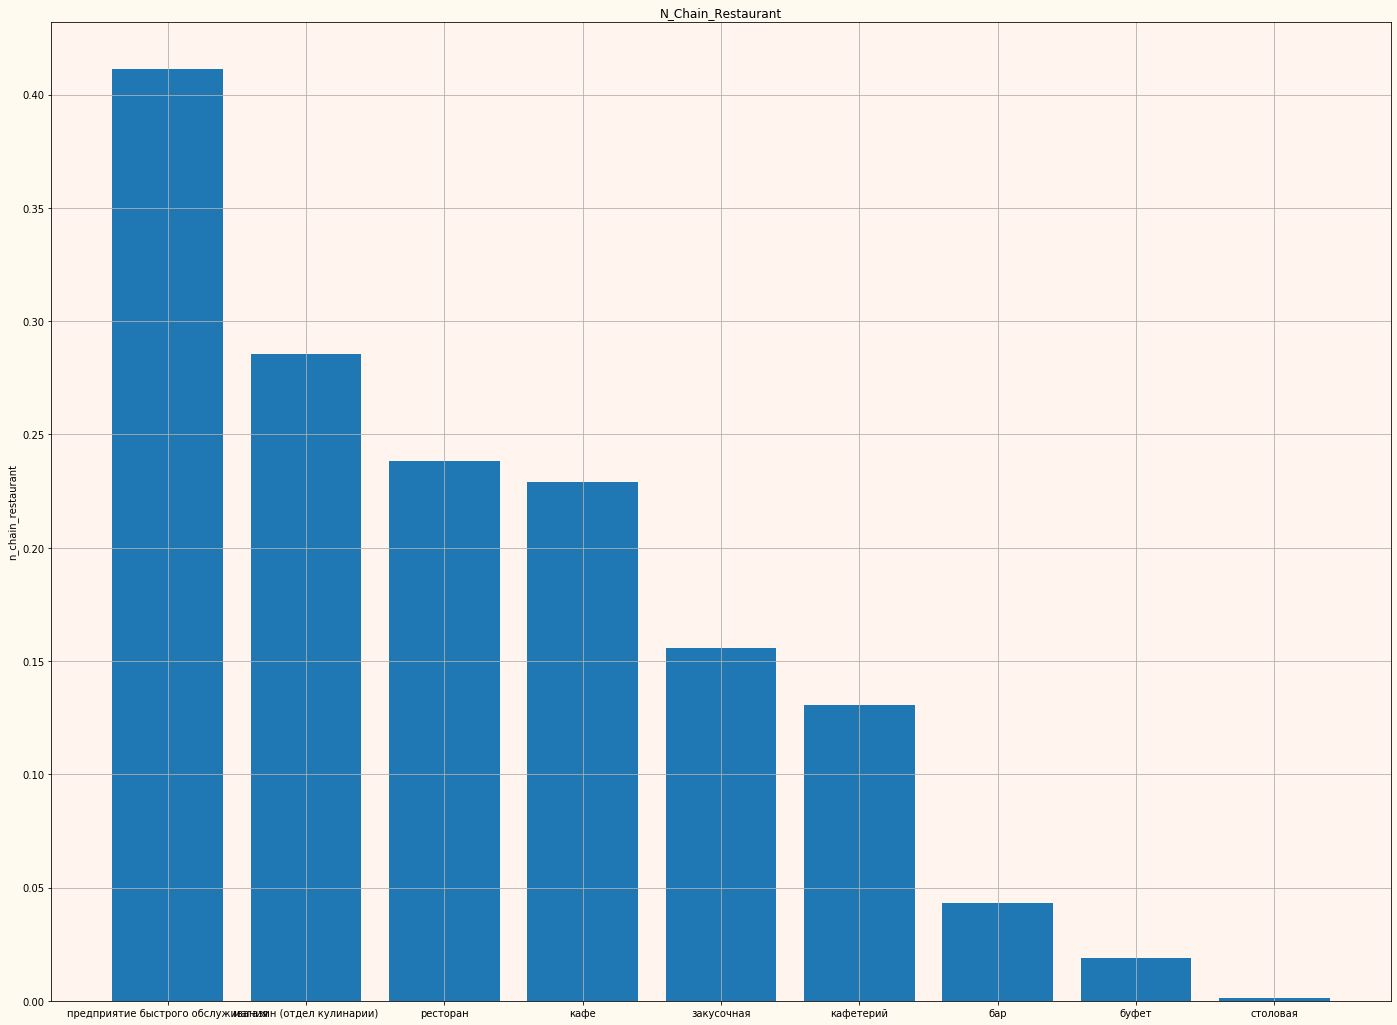

In [14]:
# построил график 
x = share_restaurant['object_type']
y = share_restaurant['share_restaurant']

fig, ax_2 = plt.subplots()

ax_2.bar(x, y)

ax_2.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(24)    #  ширина Figure
fig.set_figheight(18)    #  высота Figure

ax_2.set_ylabel('n_chain_restaurant')
ax_2.set_title('N_Chain_Restaurant')

ax_2.grid()

plt.show()

Вывод: Предприятие бытстрого обслуживания является лидером, среди объектов общественного питания для которого характерно сетевое распространение.

5.4 Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

* Оценка количества посадочных мест для сетевых заведений.

In [15]:
rest_df['number'].describe()

count    15366.000000
mean        59.547182
std         74.736833
min          0.000000
25%         12.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

Будем считать, что сетевые заведения в которых посадочных мест свыше 40 обладают большим количеством посадочных мест.

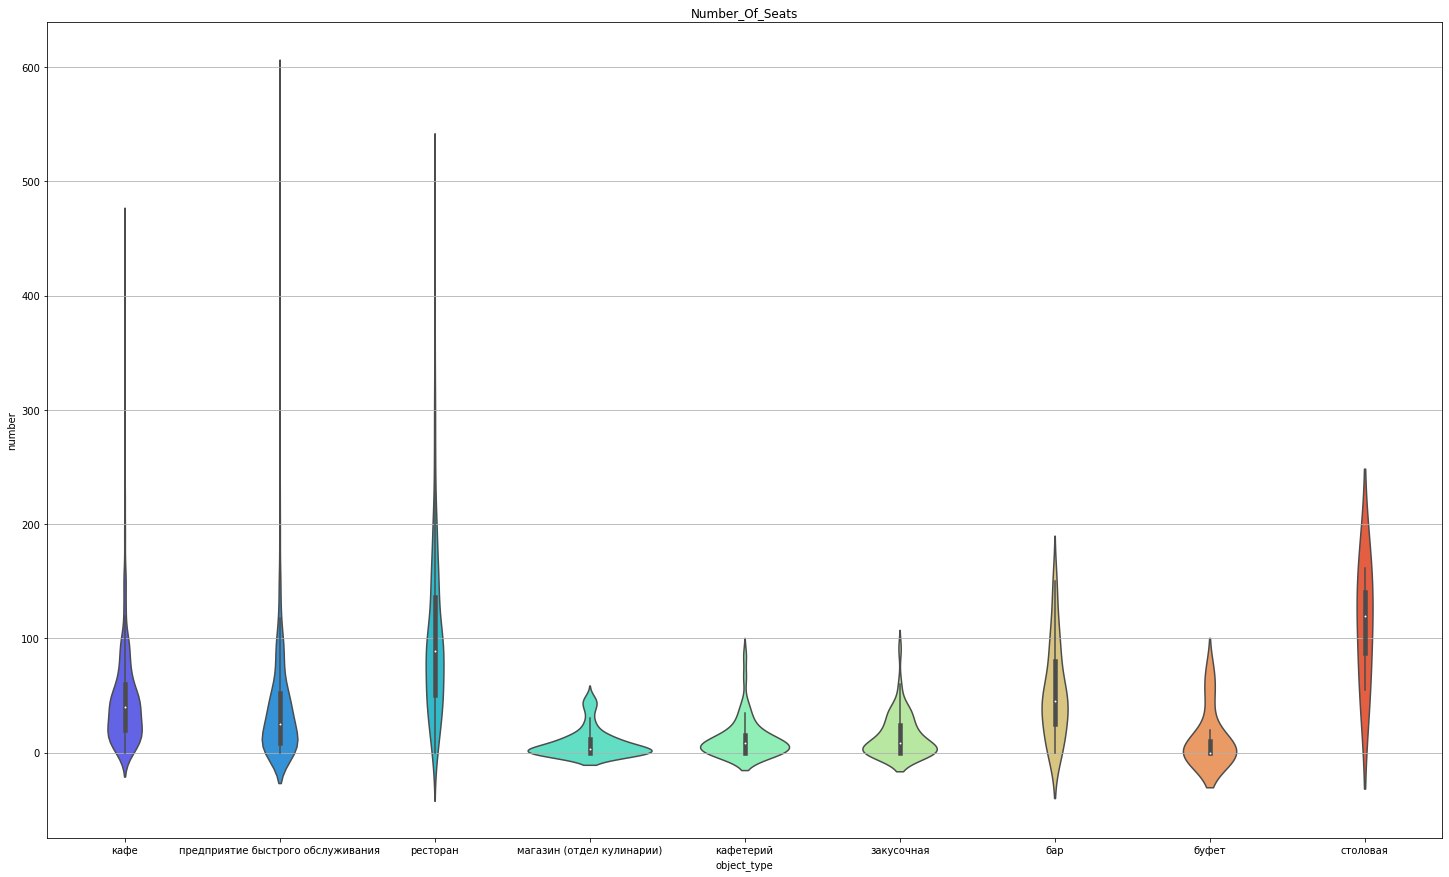

In [16]:
plt.figure(figsize=(25, 15))
plt.title('Number_Of_Seats')
plt.grid()
sns.violinplot(x='object_type', y='number', data=chain_df, palette='rainbow', );

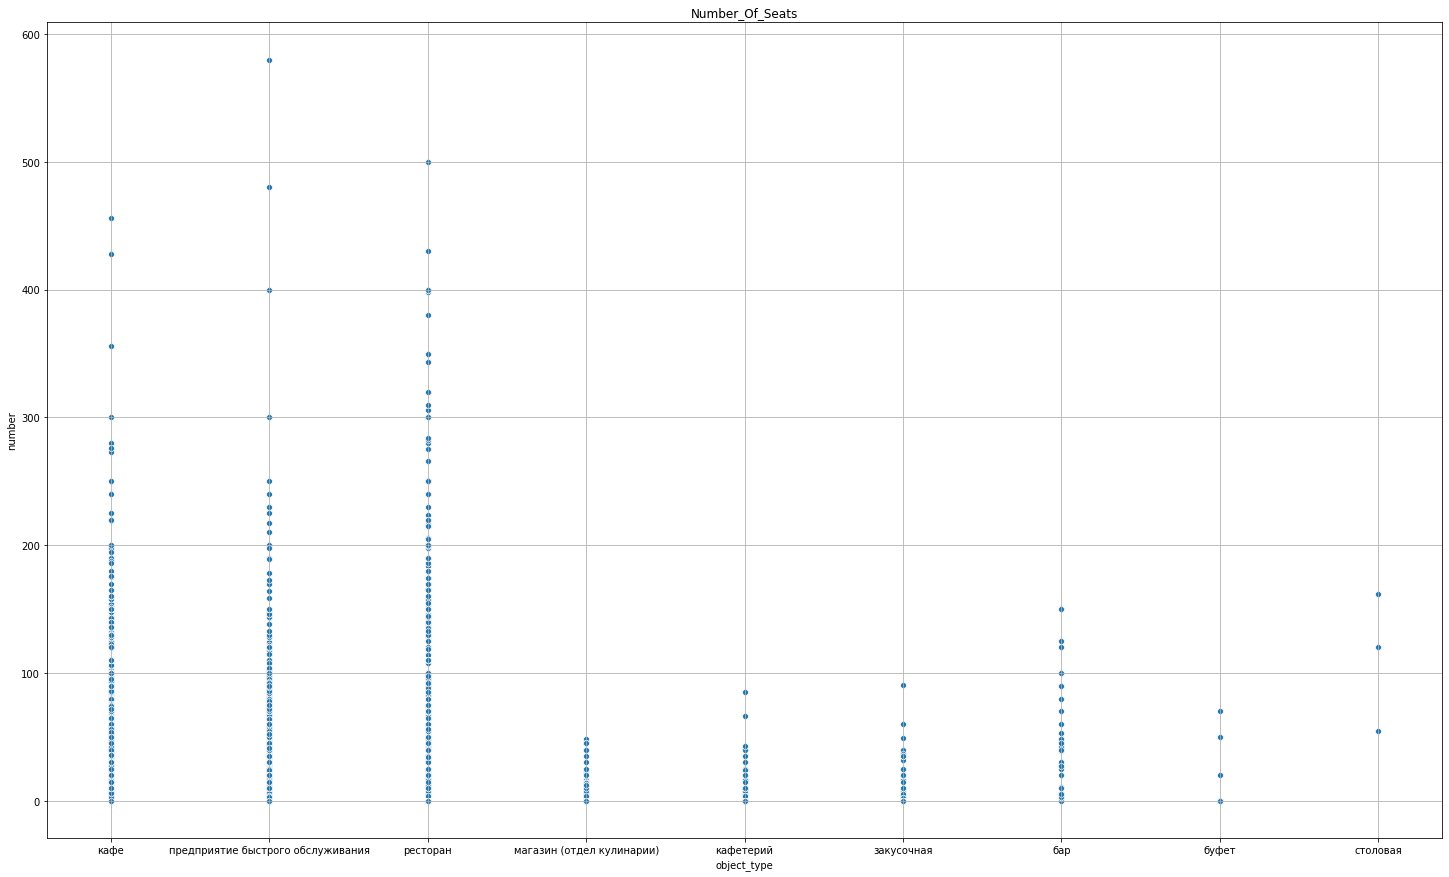

In [17]:
plt.figure(figsize=(25, 15))
plt.title('Number_Of_Seats')
plt.grid()
sns.scatterplot(x='object_type', y='number', data=chain_df);

Вывод: Для кафе, предприятий быстрого обслуживания, ресторанов, баров и столовых характерно большое количество посадочных мест.

5.5 Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

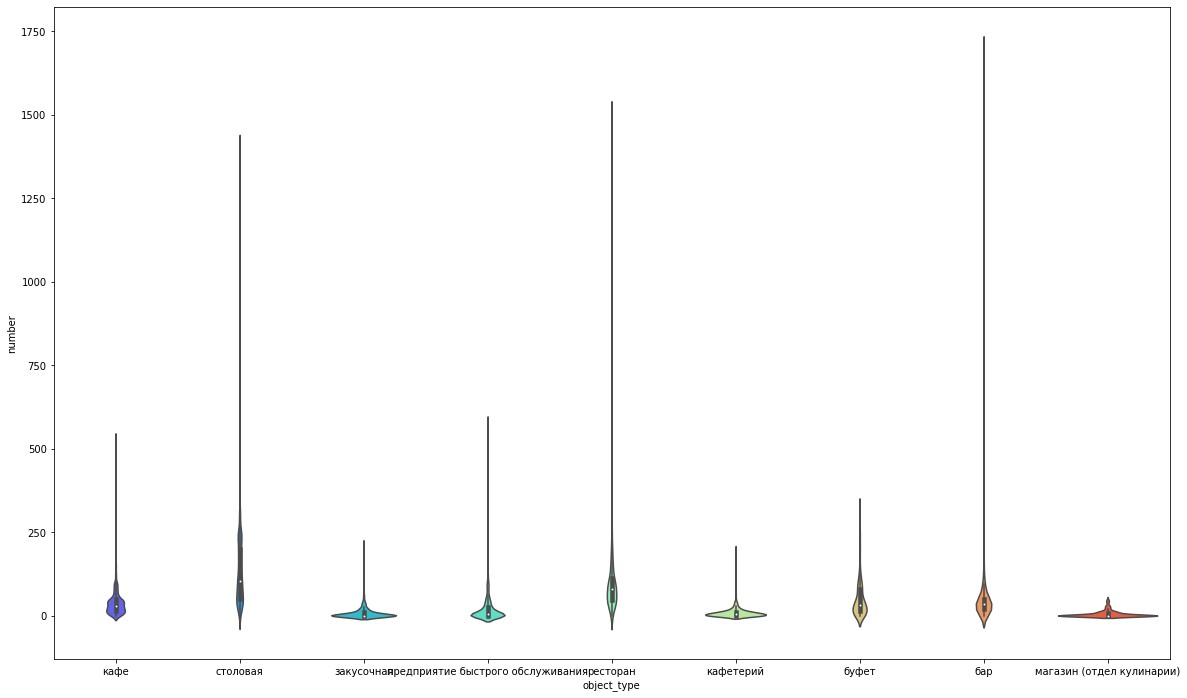

In [18]:
plt.figure(figsize=(20, 12))
sns.violinplot(x='object_type', y='number', data=rest_df, palette='rainbow');

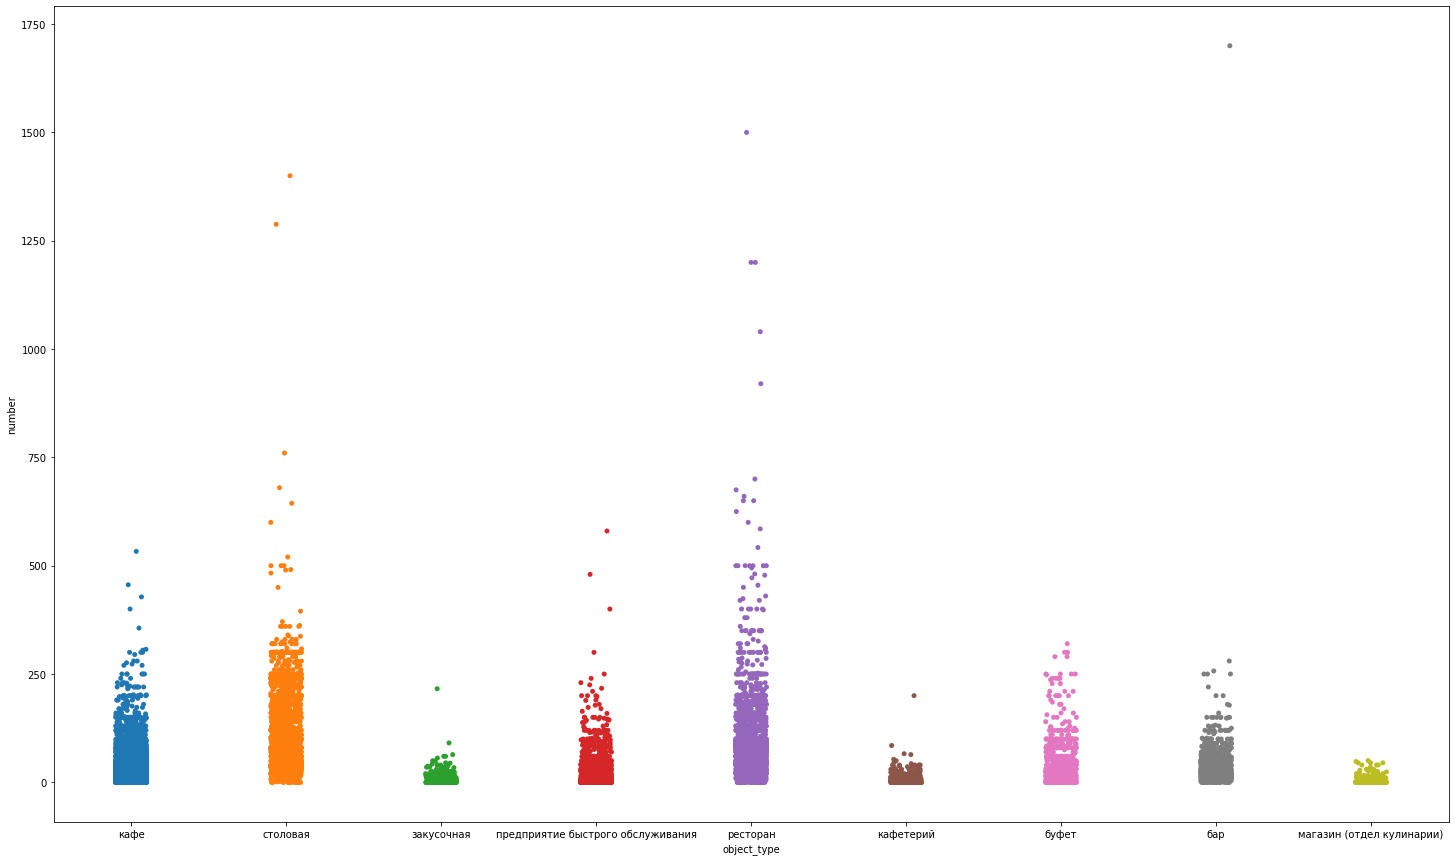

In [19]:
plt.figure(figsize=(25, 15))
sns.stripplot(x='object_type', y='number', data=rest_df);

In [20]:
mean_seats = rest_df.groupby('object_type').agg({'number': 'mean'}).reset_index()
mean_seats.columns = ['object_type', 'mean_seats']

mean_seats = mean_seats.sort_values(by='mean_seats', ascending=False)
mean_seats

,object_type,mean_seats
8,столовая,130.246618
7,ресторан,96.834136
1,буфет,51.129915
0,бар,43.494159
3,кафе,39.716019
6,предприятие быстрого обслуживания,20.552262
4,кафетерий,9.123116
2,закусочная,7.608333
5,магазин (отдел кулинарии),5.589744


Вывод: Рестораны и столовые имеют в среднем самое большое количество посадочных мест.

5.6 Выделите в отдельный столбец информацию об улице из столбца address.

5.7 Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [21]:
def get_street(address):
    
    result = re.search(',(.+?),', address)
    if result:
        found = result.group(1)
        return found
    return "error"

In [22]:
rest_df['street'] = rest_df['address'].apply(get_street)
rest_df['street'].value_counts().head(12)

 город Зеленоград          232
 проспект Мира             204
 Профсоюзная улица         182
 Ленинградский проспект    171
 Пресненская набережная    167
 Варшавское шоссе          161
 Ленинский проспект        147
 поселение Сосенское       138
 проспект Вернадского      132
 Кутузовский проспект      114
 Каширское шоссе           112
 Кировоградская улица      110
Name: street, dtype: int64

In [23]:
streets_objects = rest_df.groupby('street').agg({'object_name':'count'}).reset_index().sort_values(by='object_name', ascending=False)

streets_objects

,street,object_name
1331,город Зеленоград,232
1440,проспект Мира,204
993,Профсоюзная улица,182
683,Ленинградский проспект,171
979,Пресненская набережная,167
...,...,...
1340,дом 1,1
1342,дом 118Б,1
1343,дом 11А,1
1344,дом 16,1


In [24]:
streets_objects = streets_objects[1:12]
streets_objects = streets_objects.drop(index=[1407])
streets_objects

,street,object_name
1440,проспект Мира,204
993,Профсоюзная улица,182
683,Ленинградский проспект,171
979,Пресненская набережная,167
407,Варшавское шоссе,161
686,Ленинский проспект,147
1437,проспект Вернадского,132
674,Кутузовский проспект,114
600,Каширское шоссе,112
605,Кировоградская улица,110


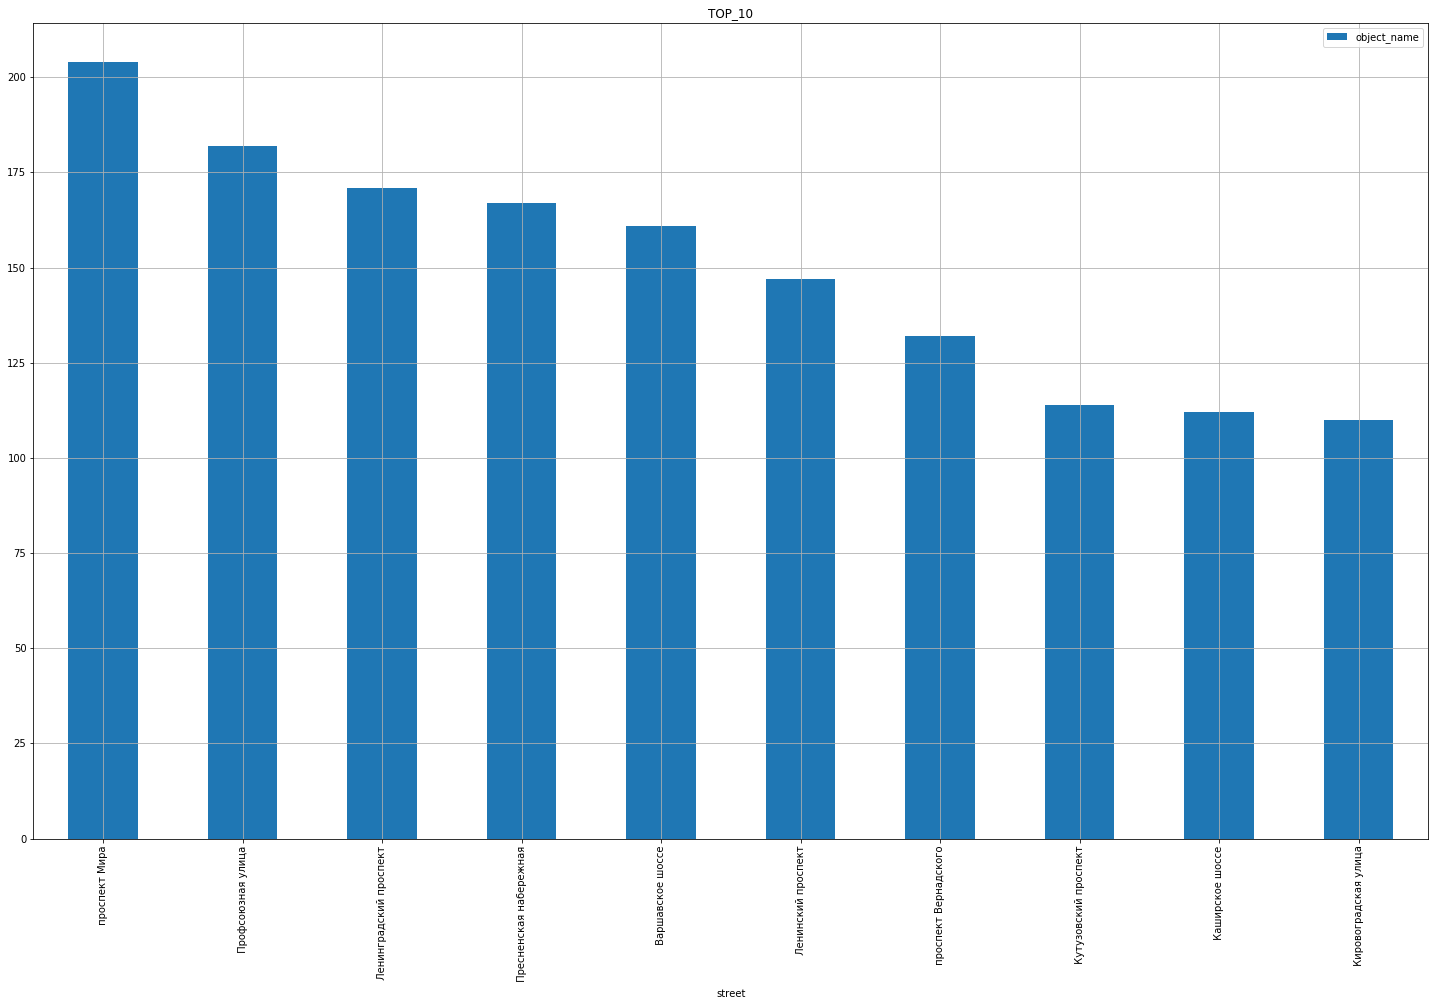

In [25]:
streets_objects.plot(x='street', grid=True, kind='bar', figsize=(25, 15), title='TOP_10')
plt.show()

In [26]:
API_URL = 'https://geocode-maps.yandex.ru/1.x'

token='def4741e-aaac-4c1e-8240-0597923a0110'

In [27]:
def get_district(address):
    
    params = {
        'geocode' : 'город Москва, '+address, 
        'format' : 'json',
        'apikey' : token
    }
    
    r = requests.get(API_URL, params=params)
    
    #получаем координаты
    coordinates = r.json()['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos']
    #делаем запрос по координатам, чтобы получить район
    params={
        "geocode": ','.join(coordinates.split(' ')),
        "apikey": token,
        "format": "json",
    }
    
    r = requests.get(API_URL, params=params)
    district = r.json()['response']['GeoObjectCollection']['featureMember'][1]['GeoObject']['metaDataProperty']['GeocoderMetaData']['text']
    return district

In [28]:
streets_objects['district'] = streets_objects['street'].apply(get_district)
streets_objects

,street,object_name,district
1440,проспект Мира,204,"Россия, Москва, Северо-Восточный административ..."
993,Профсоюзная улица,182,"Россия, Москва, Юго-Западный административный ..."
683,Ленинградский проспект,171,"Россия, Москва, Северный административный окру..."
979,Пресненская набережная,167,"Россия, Москва, Центральный административный о..."
407,Варшавское шоссе,161,"Россия, Москва, Южный административный округ, ..."
686,Ленинский проспект,147,"Россия, Москва, Юго-Западный административный ..."
1437,проспект Вернадского,132,"Россия, Москва, Юго-Западный административный ..."
674,Кутузовский проспект,114,"Россия, Москва, Западный административный окру..."
600,Каширское шоссе,112,"Россия, Москва, Южный административный округ, ..."
605,Кировоградская улица,110,"Россия, Москва, Южный административный округ, ..."


* Районы ТОП-10 улиц по количеству объектов общественного питания.

In [29]:
from io import BytesIO
spreadsheet_id = '1Iyg0hTE_do0z7Qv_2EtPhppa73iDAIklQdfj163sn-Y'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
df

,street,district
0,проспект Мира,Алексеевский район
1,проспект Мира,Мещанский район
2,проспект Мира,Ростокино район
3,проспект Мира,Ярославский район
4,профсоюзная,Академический
5,профсоюзная,Коньково
6,профсоюзная,Черемушки
7,профсоюзная,Теплый Стан
8,профсоюзная,Ясенево
9,ленинградский проспект,Аэропорт


5.8 Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [30]:
rest_df.head()

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


In [31]:
n_street = rest_df.groupby("street").agg({'id': 'count'}).reset_index()
n_street.columns = ['street', 'count']
n_street.loc[n_street.loc[:,'count'] == 1].count()

street    571
count     571
dtype: int64

In [32]:
n_street_1 = n_street.query('count == 1')
n_street_1['district_1'] = n_street_1['street'].apply(get_district)
n_street_1

KeyboardInterrupt: 

In [ ]:
n_street_1['district_1'].value_counts().sort_values(ascending=False).head(10)

* Выделил ТОП 10 районов с улицами на которых распологается 1 объект общественного питания.

In [33]:
from io import BytesIO
spreadsheet_id_1 = '1SYOqc03zVOpVhJIO9UmPpMS6Rt-MEINHgsN9j9dGCe4'
file_name_1 = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id_1)
r_1 = requests.get(file_name_1)
df_1 = pd.read_csv(BytesIO(r_1.content))
df_1

,district,n_street
0,Тверской район,44
1,Таганский район,25
2,Тимирязевский район,19
3,Басманный район,18
4,район Марьина Роща,17
5,Мещанский район,15
6,район Замоскворечье,13
7,Пресненский район,12
8,район Сокольники,10
9,район Богородское,10


5.9 Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

* Оценил среднее количество посадочных мест для улиц с большим количеством объектов общественного питания.

In [34]:
streets_objects_number = rest_df.groupby('street').agg({'object_name':'count', 'number':'mean'}).reset_index().sort_values(by='object_name', ascending=False)
streets_objects_number = streets_objects_number[1:11]
streets_objects_number

,street,object_name,number
1440,проспект Мира,204,62.696078
993,Профсоюзная улица,182,46.412088
683,Ленинградский проспект,171,52.690058
979,Пресненская набережная,167,45.844311
407,Варшавское шоссе,161,52.875776
686,Ленинский проспект,147,63.469388
1407,поселение Сосенское,138,22.550725
1437,проспект Вернадского,132,66.969697
674,Кутузовский проспект,114,85.061404
600,Каширское шоссе,112,55.098214


Вывод: На улицах с большим количество объектов общественного питания, свыше 40 посадочных мест, т.е объекты общепита в основном с большим количеством посадочных мест.

5.10 Сделайте общий вывод и дайте рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируйте возможность развития сети.

Общий вывод: Улицы из списка топ-10 по количеству объектов общественного питания имеют близкое расположение к местам большого скопления людей, например торговые центры:
- Ходынский бульвар, дом 4 - ТРЦ Авиапарк, 
- город Москва, Кутузовский проспект, дом 57 - ТРЦ Океания, 
- город Москва, проспект Мира, дом 211, корпус 2 - ТРЦ Европолис, 
- город Москва, площадь Киевского Вокзала, дом 2 - ТРЦ Европейский, 
- город Москва, улица Земляной Вал, дом 33 - ТРЦ Атриум.

Популярные локации для проведения досуга:
- город Москва, улица Новый Арбат

Крупный рынок: 
- город Москва, Мытная улица, дом 74 - Даниловский рынок.

Для сетевых кафе, предприятий быстрого питания, ресторанов, баров и столовых характерно большое количество посадочных мест, вполне логично что чем больше клиентов, тем больше прибыль.

Для успешного старта и развития, лучше всего открыть бар,ресторан либо кафе в котором будет свыше 40 посадочных мест и распологаться заведение будет в ТРЦ или в центре города.

### Презентация
<a id='cell3'></a>

Презентация: https://disk.yandex.ru/i/8ZlPYNafz7Pn-Q